# Machine Learning Models: SVC and Ranfom Forest

## Imports

In [1]:
import sys
sys.path.append('..')

from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from PIL import Image
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd

# Import ML utility functions
from src.ml_model_utils import *

import os
csv_dir = os.path.abspath(os.path.join(os.getcwd(), '..', 'dataset'))

train_csv = os.path.join(csv_dir, 'balanced_train.csv')
test_csv = os.path.join(csv_dir, 'balanced_test.csv')

In [2]:
balanced_train_image_paths = pd.read_csv(train_csv)['image_path'].tolist()
balanced_test_image_paths = pd.read_csv(test_csv)['image_path'].tolist()

In [3]:
balanced_train_image = pd.read_csv(train_csv)
balanced_test_image = pd.read_csv(test_csv)

In [4]:
balanced_train_image

,filename,Original Emotion,Emotion,Regruped Emotion,image_path
0,Training_16877236.jpg,sad,sad,negative,../dataset/train/sad/Training_16877236.jpg
1,Training_27475992.jpg,angry,angry,negative,../dataset/train/angry/Training_27475992.jpg
2,Training_51484503.jpg,angry,angry,negative,../dataset/train/angry/Training_51484503.jpg
3,Training_62136050.jpg,angry,angry,negative,../dataset/train/angry/Training_62136050.jpg
4,Training_20213277.jpg,sad,sad,negative,../dataset/train/sad/Training_20213277.jpg
...,...,...,...,...,...
8995,Training_13766393.jpg,happy,happy,positive,../dataset/train/happy/Training_13766393.jpg
8996,Training_67409409.jpg,happy,happy,positive,../dataset/train/happy/Training_67409409.jpg
8997,Training_16358404.jpg,happy,happy,positive,../dataset/train/happy/Training_16358404.jpg
8998,Training_31016172.jpg,happy,happy,positive,../dataset/train/happy/Training_31016172.jpg


## Image Generation

**Image generation through data augmentation** is a powerful technique used to improve a model's ability to generalize by artificially expanding the training dataset. By applying random transformations such as rotation, shifting, zooming, and flipping, the model is exposed to a wider variety of image variations that it might encounter in real-world scenarios. This helps prevent overfitting and allows the model to learn more robust and invariant features, ultimately improving its performance on unseen data.

In [5]:
# Data Augmentation for better generalization
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

## Feature Extraction

#### Using model VGG16 without the classification layers

**VGG16** is a convolutional neural network (CNN) architecture developed by the Visual Geometry Group at the University of Oxford. It’s known for its deep yet simple architecture made up of 13 convolutional layers and 3 fully connected (FC) layers. Instead of training a model from scratch, we can use pretrained models like VGG16, which have already learned to detect low-level and mid-level features (like edges, textures, shapes) from large datasets like ImageNet. 

For this case, we removed the top layers (classification layers) and keep only the convolutional base.

**- Benefits**
- Faster training — no need to learn low-level features from scratch.
- High accuracy even with small datasets.
- Useful as a first step before trying more complex deep learning models.

In [6]:
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [7]:
# Fine-tuning VGG16
vgg_model.trainable = True
for layer in vgg_model.layers[:15]:
    layer.trainable = False

In [8]:
# Train Feature Extraction
X = extract_features(balanced_train_image_paths, vgg_model, datagen)
y = balanced_train_image["Regruped Emotion"]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [9]:
# Test Feature Extraction
X_test = extract_features(balanced_test_image_paths, vgg_model, datagen)
y_test = balanced_test_image["Regruped Emotion"]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

## Train, Validation and Test Sets

In [10]:
# Dividir en conjunto de train (80%) y validación (20%)
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

## SVM (SVC) model

The **SVC (Support Vector Classification)** class from `sklearn.svm` is a popular supervised learning model used for classification tasks. It's based on the Support Vector Machine (SVM) algorithm, which is especially effective for high-dimensional spaces like image feature vectors extracted from models like VGG16. The main idea is that SVC finds the hyperplane that best separates the classes in the feature space. It maximizes the margin between the closest points of different classes, called support vectors.

In [11]:
# Train and evaluate the SVM model
clf = train_and_evaluate_svm(X_train, y_train, X_val, y_val, X_test, y_test)

Validation Classification Report:
              precision    recall  f1-score   support

    negative       0.49      0.53      0.51       600
     neutral       0.54      0.53      0.53       600
    positive       0.58      0.54      0.56       600

    accuracy                           0.53      1800
   macro avg       0.54      0.53      0.53      1800
weighted avg       0.54      0.53      0.53      1800

Test Classification Report:
              precision    recall  f1-score   support

    negative       0.50      0.56      0.53       744
     neutral       0.56      0.54      0.55       744
    positive       0.62      0.57      0.59       744

    accuracy                           0.56      2232
   macro avg       0.56      0.56      0.56      2232
weighted avg       0.56      0.56      0.56      2232



The SVC model shows **moderate performance**, with an overall accuracy of **53% on the validation set** and **56% on the test set**. The **precision, recall, and F1-scores** are fairly balanced across the three classes, though slightly higher for the *positive* class. This suggests the model has learned to distinguish between the emotion groups to some extent but still struggles, likely due to the limited size and complexity of the dataset. The results are consistent with a model that has generalized slightly better to the test set than the validation set, but the performance indicates there’s **room for improvement**, possibly through deeper feature extraction, model tuning, or using a more expressive classifier.

Accuracy: 0.5338888888888889
Classification Report:
               precision    recall  f1-score      support
negative       0.486903  0.526667  0.506005   600.000000
neutral        0.537943  0.531667  0.534786   600.000000
positive       0.584229  0.543333  0.563040   600.000000
accuracy       0.533889  0.533889  0.533889     0.533889
macro avg      0.536358  0.533889  0.534610  1800.000000
weighted avg   0.536358  0.533889  0.534610  1800.000000


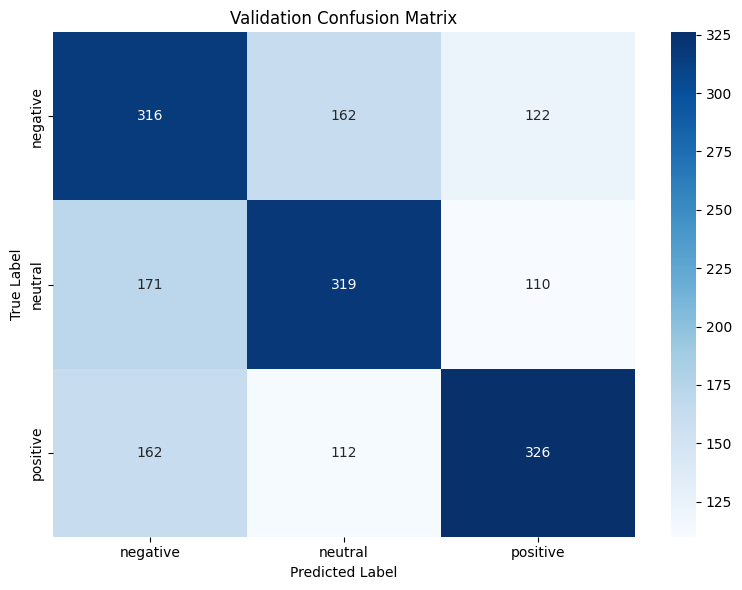

Accuracy: 0.556899641577061
Classification Report:
               precision    recall  f1-score    support
negative       0.502410  0.560484  0.529860   744.0000
neutral        0.561892  0.543011  0.552290   744.0000
positive       0.617862  0.567204  0.591451   744.0000
accuracy       0.556900  0.556900  0.556900     0.5569
macro avg      0.560721  0.556900  0.557867  2232.0000
weighted avg   0.560721  0.556900  0.557867  2232.0000


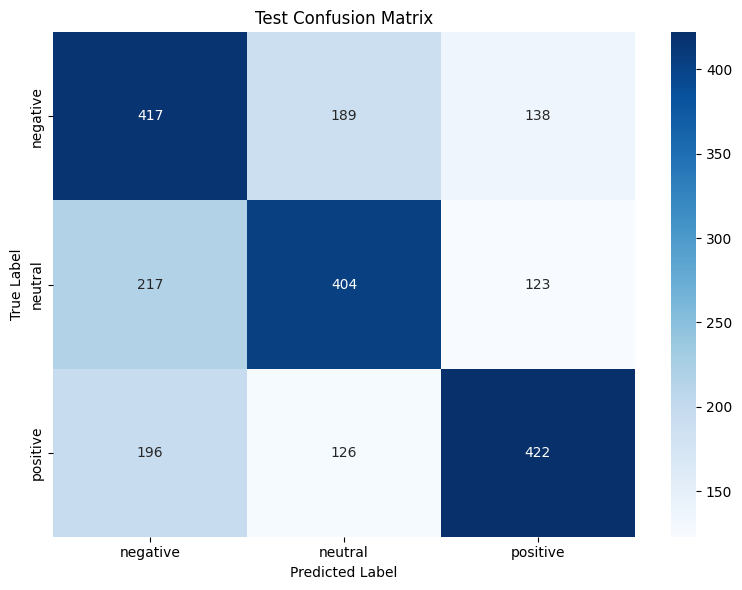

,precision,recall,f1-score,support
negative,0.502410,0.560484,0.529860,744.0000
neutral,0.561892,0.543011,0.552290,744.0000
positive,0.617862,0.567204,0.591451,744.0000
accuracy,0.556900,0.556900,0.556900,0.5569
macro avg,0.560721,0.556900,0.557867,2232.0000
weighted avg,0.560721,0.556900,0.557867,2232.0000


In [12]:
y_pred_val = clf.predict(X_val)
evaluate_classification_metrics(y_val, y_pred_val, classes=balanced_train_image["Regruped Emotion"].unique(), title="Validation Confusion Matrix")

y_pred_test = clf.predict(X_test)
evaluate_classification_metrics(y_test, y_pred_test, classes=balanced_train_image["Regruped Emotion"].unique(), title="Test Confusion Matrix")

## Random Forest

The **Random Forest (RF)** classifier from `sklearn.ensemble` is a versatile and widely used supervised learning model for classification tasks. It belongs to the ensemble learning family, where multiple decision trees are combined to create a robust model. The main idea behind Random Forest is to build a collection of decision trees during training, each trained on random subsets of the data, and then combine their predictions through a majority voting mechanism.

Random Forests are particularly effective for high-dimensional data like image features extracted by deep learning models such as VGG16. They work by randomly selecting subsets of features and data points, which helps in reducing overfitting and improving generalization. The model also computes feature importance, helping to identify which features contribute most to the classification task.

In [13]:
# Train and evaluate the Random Forest model
clf_rf = train_and_evaluate_rf(X_train, y_train, X_val, y_val, X_test, y_test)

Validation Classification Report:
              precision    recall  f1-score   support

    negative       0.41      0.43      0.42       600
     neutral       0.46      0.42      0.44       600
    positive       0.49      0.50      0.49       600

    accuracy                           0.45      1800
   macro avg       0.45      0.45      0.45      1800
weighted avg       0.45      0.45      0.45      1800

Test Classification Report:
              precision    recall  f1-score   support

    negative       0.44      0.43      0.44       744
     neutral       0.44      0.45      0.45       744
    positive       0.48      0.49      0.49       744

    accuracy                           0.46      2232
   macro avg       0.46      0.46      0.46      2232
weighted avg       0.46      0.46      0.46      2232



Accuracy: 0.4527777777777778
Classification Report:
               precision    recall  f1-score      support
negative       0.413629  0.435000  0.424045   600.000000
neutral        0.460980  0.423333  0.441355   600.000000
positive       0.485437  0.500000  0.492611   600.000000
accuracy       0.452778  0.452778  0.452778     0.452778
macro avg      0.453349  0.452778  0.452671  1800.000000
weighted avg   0.453349  0.452778  0.452671  1800.000000


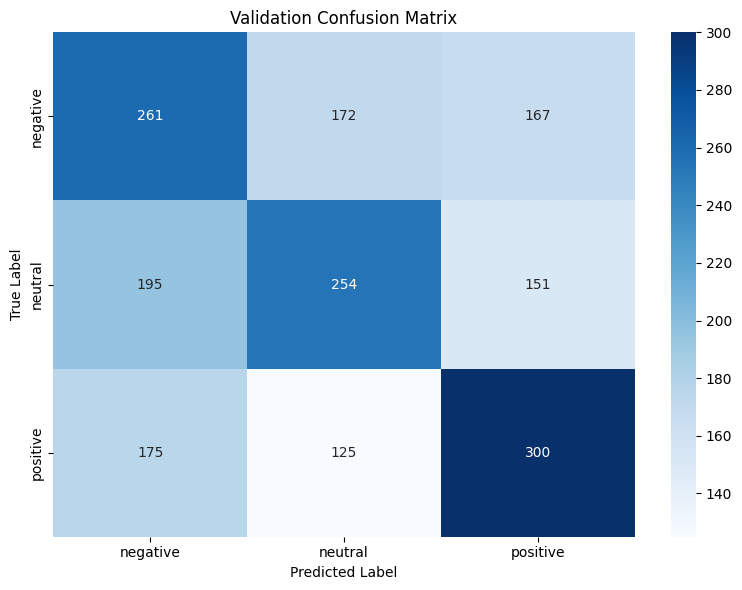

Accuracy: 0.4574372759856631
Classification Report:
               precision    recall  f1-score      support
negative       0.443681  0.434140  0.438859   744.000000
neutral        0.443409  0.447581  0.445485   744.000000
positive       0.484728  0.490591  0.487642   744.000000
accuracy       0.457437  0.457437  0.457437     0.457437
macro avg      0.457273  0.457437  0.457329  2232.000000
weighted avg   0.457273  0.457437  0.457329  2232.000000


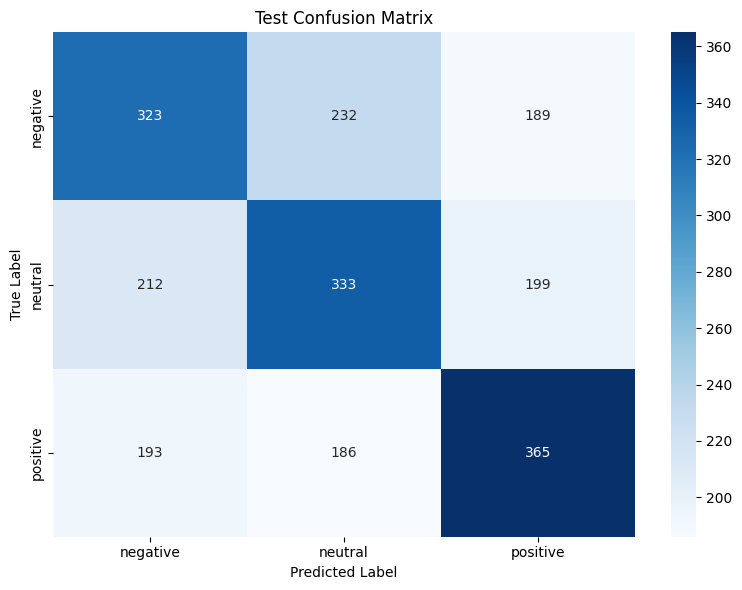

,precision,recall,f1-score,support
negative,0.443681,0.434140,0.438859,744.000000
neutral,0.443409,0.447581,0.445485,744.000000
positive,0.484728,0.490591,0.487642,744.000000
accuracy,0.457437,0.457437,0.457437,0.457437
macro avg,0.457273,0.457437,0.457329,2232.000000
weighted avg,0.457273,0.457437,0.457329,2232.000000


In [14]:
y_pred_val = clf_rf.predict(X_val)
evaluate_classification_metrics(y_val, y_pred_val, classes=balanced_train_image["Regruped Emotion"].unique(), title="Validation Confusion Matrix")

y_pred_test = clf_rf.predict(X_test)
evaluate_classification_metrics(y_test, y_pred_test, classes=balanced_train_image["Regruped Emotion"].unique(), title="Test Confusion Matrix")